# Plot distribution of FIMO scores (actually the q-value as this is corrected). 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
promoters_file='../../data/genes/constitutive-variable-random_100_each.csv'
mapped_motif_bed = "../../data/FIMO/responsivepromoters_motifs_mapped.bed"

In [8]:
promoters = pd.read_csv(promoters_file, header=0)
promoters = promoters[['promoter_AGI','gene_type']]
promoters

,promoter_AGI,gene_type
0,AT4G34270,housekeeping
1,AT3G32260,housekeeping
2,AT1G59830,housekeeping
3,AT4G33380,housekeeping
4,AT2G28390,housekeeping
...,...,...
295,AT5G13410,randCont
296,AT5G56090,randCont
297,AT5G05170,randCont
298,AT3G18110,randCont


In [11]:
df = pd.read_table(mapped_motif_bed, sep='\t', header=None)
cols = ['chr', 'start', 'stop', 'name_rep', 'score', 'strand', 'promoter_AGI', 'p-value', 'q-value', 'matched_sequence', 'TF_name', 'TF_family', 'TF_AGI']
df.columns = cols
df

,chr,start,stop,name_rep,score,strand,promoter_AGI,p-value,q-value,matched_sequence,TF_name,TF_family,TF_AGI
0,1,33629,33647,ABI3VP1_tnt.VRN1_colamp_a,7.86301,-,AT1G01050,0.000080,0.04650,AAGTTTTGTCTTTTGGTGT,VRN1,ABI3VP1,AT3G18990
1,1,33961,33979,ABI3VP1_tnt.VRN1_colamp_a,10.71230,+,AT1G01050,0.000030,0.02870,GTGGATGTTTTTTTTTTAC,VRN1,ABI3VP1,AT3G18990
2,1,33962,33982,REM_tnt.REM19_colamp_a,11.16180,-,AT1G01050,0.000034,0.02860,GAGGTAAAAAAAAAACATCCA,REM19,REM,AT1G49480
3,1,33964,33982,ABI3VP1_tnt.VRN1_colamp_a,10.35620,+,AT1G01050,0.000034,0.03080,GATGTTTTTTTTTTACCTC,VRN1,ABI3VP1,AT3G18990
4,1,34064,34084,ND_tnt.FRS9_col_a,7.51562,+,AT1G01050,0.000014,0.03250,ACTTGGCTCTCTTTCACTTCC,FRS9,ND,AT4G38170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16242,5,26957500,26957518,C2H2_tnt.TF3A_col_a,11.18640,-,AT5G67590,0.000018,0.04110,GCTTCTTCTCCTCCTTCCT,TF3A,C2H2,AT1G72050
16243,5,26957503,26957521,C2H2_tnt.TF3A_col_a,12.82200,-,AT5G67590,0.000008,0.02690,CATGCTTCTTCTCCTCCTT,TF3A,C2H2,AT1G72050
16244,5,26957535,26957563,BBRBPC_tnt.BPC5_colamp_a,3.36047,+,AT5G67590,0.000009,0.01770,AACCAAAGGAGAGTTTTCGAGAGAGAGAC,BPC5,BBRBPC,AT4G38910
16245,5,26957541,26957564,BBRBPC_tnt.BPC1_col_a,1.12500,+,AT5G67590,0.000034,0.04670,AGGAGAGTTTTCGAGAGAGAGACT,BPC1,BBRBPC,AT2G01930


In [13]:
#make df containing only unique promoters and q_value
q_value_df = df.groupby(by='promoter_AGI', as_index=False).agg({'q-value': pd.Series.nunique})
q_value_df

,promoter_AGI,q-value
0,AT1G01050,7.0
1,AT1G01780,107.0
2,AT1G01910,23.0
3,AT1G02000,8.0
4,AT1G03070,92.0
...,...,...
394,AT5G65360,7.0
395,AT5G65470,6.0
396,AT5G66250,1.0
397,AT5G67210,19.0


In [16]:
#merge with promoters of interest
merged = pd.merge(promoters, q_value_df, on='promoter_AGI')
merged

,promoter_AGI,gene_type,q-value
0,AT4G34270,housekeeping,4.0
1,AT3G32260,housekeeping,9.0
2,AT1G59830,housekeeping,2.0
3,AT4G33380,housekeeping,10.0
4,AT2G28390,housekeeping,40.0
...,...,...,...
292,AT5G13410,randCont,33.0
293,AT5G56090,randCont,55.0
294,AT5G05170,randCont,16.0
295,AT3G18110,randCont,5.0


In [20]:
#count number of promoters that were in fimo scan
merged.gene_type.value_counts()

randCont        100
highVar          99
housekeeping     98
Name: gene_type, dtype: int64

In [21]:
#identify genes not present in FIMO scan
promoters[(~promoters.promoter_AGI.isin(merged.promoter_AGI))]

,promoter_AGI,gene_type
54,AT2G36240,housekeeping
67,AT3G47836,housekeeping
180,AT4G25150,highVar


## Araport details
## AT2G36240 pentatricopeptide (PPR) repeat-containing protein
## AT3G47836 transmembrane protein, unknown
##  AT4G25150 HAD superfamily, subfamily IIIB acid phosphatase

#### subset motifs df for just promtoers of interest

In [ ]:
#nmb
promoter_list = df.promoter_AGI.unique()
promoter_list = pd.DataFrame(promoter_list)
promoter_list

In [23]:
motifs_of_interest = df[df.promoter_AGI.isin(promoters.promoter_AGI)]
motifs_of_interest

,chr,start,stop,name_rep,score,strand,promoter_AGI,p-value,q-value,matched_sequence,TF_name,TF_family,TF_AGI
7,1,281809,281827,C2H2_tnt.TF3A_col_a,11.40680,+,AT1G01780,0.000016,0.03910,TTTCATCACTCTCCTGCTC,TF3A,C2H2,AT1G72050
8,1,281812,281835,BBRBPC_tnt.BPC1_col_a,4.21875,-,AT1G01780,0.000012,0.02500,GCCAGATGGAGCAGGAGAGTGATG,BPC1,BBRBPC,AT2G01930
9,1,282282,282309,C2C2dof_tnt.At4g38000_col_a,13.76560,-,AT1G01780,0.000009,0.04250,GATTCCTTCTTTTTCTATTATCTTTTAG,AT4G38000,C2C2DOF,AT4G38000
10,1,282285,282305,C2C2dof_tnt.OBP3_col_a,13.50000,-,AT1G01780,0.000011,0.04720,CCTTCTTTTTCTATTATCTTT,OBP3,C2C2DOF,AT3G55370
11,1,282418,282438,ND_tnt.FRS9_col_a,6.81250,-,AT1G01780,0.000018,0.03730,ATATCATTCTCTCTCAATCAA,FRS9,ND,AT4G38170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16242,5,26957500,26957518,C2H2_tnt.TF3A_col_a,11.18640,-,AT5G67590,0.000018,0.04110,GCTTCTTCTCCTCCTTCCT,TF3A,C2H2,AT1G72050
16243,5,26957503,26957521,C2H2_tnt.TF3A_col_a,12.82200,-,AT5G67590,0.000008,0.02690,CATGCTTCTTCTCCTCCTT,TF3A,C2H2,AT1G72050
16244,5,26957535,26957563,BBRBPC_tnt.BPC5_colamp_a,3.36047,+,AT5G67590,0.000009,0.01770,AACCAAAGGAGAGTTTTCGAGAGAGAGAC,BPC5,BBRBPC,AT4G38910
16245,5,26957541,26957564,BBRBPC_tnt.BPC1_col_a,1.12500,+,AT5G67590,0.000034,0.04670,AGGAGAGTTTTCGAGAGAGAGACT,BPC1,BBRBPC,AT2G01930


In [29]:
#add the gene_type column to motifs df
motifs_of_interest = pd.merge(motifs_of_interest, promoters, on='promoter_AGI')
motifs_of_interest

,chr,start,stop,name_rep,score,strand,promoter_AGI,p-value,q-value,matched_sequence,TF_name,TF_family,TF_AGI,gene_type
0,1,281809,281827,C2H2_tnt.TF3A_col_a,11.40680,+,AT1G01780,0.000016,0.03910,TTTCATCACTCTCCTGCTC,TF3A,C2H2,AT1G72050,highVar
1,1,281812,281835,BBRBPC_tnt.BPC1_col_a,4.21875,-,AT1G01780,0.000012,0.02500,GCCAGATGGAGCAGGAGAGTGATG,BPC1,BBRBPC,AT2G01930,highVar
2,1,282282,282309,C2C2dof_tnt.At4g38000_col_a,13.76560,-,AT1G01780,0.000009,0.04250,GATTCCTTCTTTTTCTATTATCTTTTAG,AT4G38000,C2C2DOF,AT4G38000,highVar
3,1,282285,282305,C2C2dof_tnt.OBP3_col_a,13.50000,-,AT1G01780,0.000011,0.04720,CCTTCTTTTTCTATTATCTTT,OBP3,C2C2DOF,AT3G55370,highVar
4,1,282418,282438,ND_tnt.FRS9_col_a,6.81250,-,AT1G01780,0.000018,0.03730,ATATCATTCTCTCTCAATCAA,FRS9,ND,AT4G38170,highVar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,5,26957500,26957518,C2H2_tnt.TF3A_col_a,11.18640,-,AT5G67590,0.000018,0.04110,GCTTCTTCTCCTCCTTCCT,TF3A,C2H2,AT1G72050,randCont
10848,5,26957503,26957521,C2H2_tnt.TF3A_col_a,12.82200,-,AT5G67590,0.000008,0.02690,CATGCTTCTTCTCCTCCTT,TF3A,C2H2,AT1G72050,randCont
10849,5,26957535,26957563,BBRBPC_tnt.BPC5_colamp_a,3.36047,+,AT5G67590,0.000009,0.01770,AACCAAAGGAGAGTTTTCGAGAGAGAGAC,BPC5,BBRBPC,AT4G38910,randCont
10850,5,26957541,26957564,BBRBPC_tnt.BPC1_col_a,1.12500,+,AT5G67590,0.000034,0.04670,AGGAGAGTTTTCGAGAGAGAGACT,BPC1,BBRBPC,AT2G01930,randCont


In [26]:
#check that the promoters are the ones of interest
promoter_list = motifs_of_interest.promoter_AGI.unique()
promoter_list = pd.DataFrame(promoter_list)
promoter_list

,0
0,AT1G01780
1,AT1G01910
2,AT1G02000
3,AT1G03070
4,AT1G03457
...,...
292,AT5G64050
293,AT5G64813
294,AT5G66250
295,AT5G67210


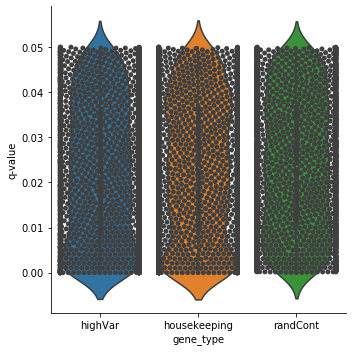

In [34]:
#### plot qvalue vs promoter type
plot = sns.catplot(x="gene_type", y="q-value", data=motifs_of_interest, kind='violin')
#plot points
ax = sns.swarmplot(x="gene_type", y="q-value", data=motifs_of_interest, color=".25").get_figure().savefig('../../data/plots/FIMO_score/variable_const_q_value_violin.pdf', format='pdf')

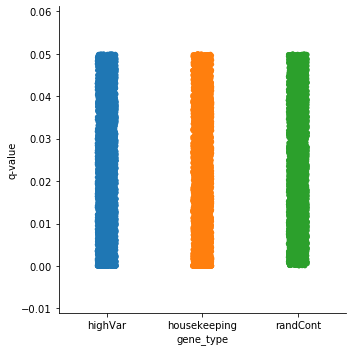

In [37]:
sns.catplot(x="gene_type", y="q-value", data=motifs_of_interest).savefig('../../data/plots/FIMO_score/variable_const_q_value.pdf', format='pdf')